In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

from scipy.integrate import quad,simps

We analyze the numerical integration of the function

$$
\int_{0}^{t}e^{(i\Delta\epsilon_{cvk}+\eta)t'}\mathbf{E}(t')
$$

that appears in the solution of the first order approximation of the density matrix

The expression of the field is loaded directly from the yambo output (x component)

In [2]:
f = 'o-Int_1000-dephase_0.002-freq_1.5.external_field'
field_file = C.dict_parser(f)
t = np.array(field_file['time'])
Ex = np.array(field_file['E_x/Re[V/m]'])

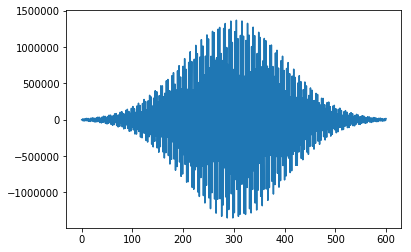

In [3]:
plt.plot(t,Ex)

Analogous expression can be built analytically (check the position of the center of the guassian in yambo!)

In [4]:
t = np.arange(0.,600) # in fs
E = 1.5#photon energy eV
hplanck = 0.65821196 # using planck reduced in ev*fs
omega = E/hplanck
t0 = 300
L = 100
#omega = 0.00276 # 1.5 eV in ps
Ex = np.sin(omega*t)*np.exp(-0.5*((t-t0)/L)**2)

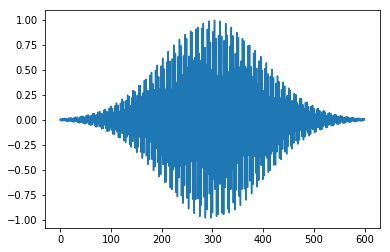

In [5]:
plt.plot(t,Ex)

We rewrite the integrand as follows:

$$
e^{\eta t'}\left(cos(\epsilon t') + isin(\epsilon t') \right) E(t') \, ,
$$
where $\epsilon = \Delta\epsilon_{cvk}$. 

We compute the integral splitting the real and imaginary part

In [6]:
eta_ev = 0. #0.002 #eV
eta = eta_ev/hplanck
eps_ev = 1.5 # gap
eps = eps_ev/hplanck

In [7]:
int_re = np.exp(eta*t)*np.cos(eps*t)*Ex
int_im = np.exp(eta*t)*np.sin(eps*t)*Ex

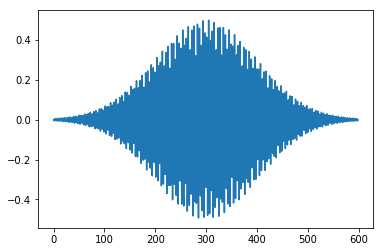

In [8]:
plt.plot(t,int_re)

In [9]:
I_re = []
I_im = []
I_re.append(0.)
I_im.append(0.)
for ind in range(1,600):
    I_re.append(simps(y=int_re[0:ind],x=t[0:ind]))
    I_im.append(simps(y=int_im[0:ind],x=t[0:ind]))
I_re = np.array(I_re)
I_im = np.array(I_im)

We can reconstuct the real and imaginary part of the complete density matrix at the first order

In [10]:
rho_re = np.exp(-eta*t)*(np.cos(eps*t)*I_re + np.sin(eps*t)*I_im)
rho_im = np.exp(-eta*t)*(np.cos(eps*t)*I_im - np.sin(eps*t)*I_re)

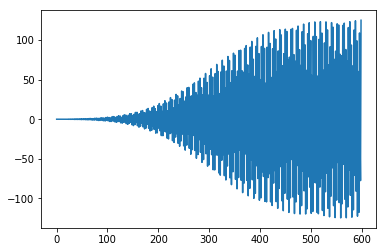

In [11]:
plt.plot(t,rho_re)

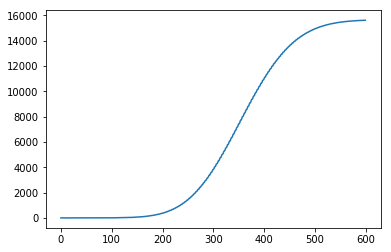

In [12]:
plt.plot(t,rho_re**2+rho_im**2)

In [13]:
energies = [1.3,1.49,1.5,1.65,1.7] #photon energies

In [14]:
rho_re = {}
rho_im = {}
for e in energies:
    omega = e/hplanck
    Ex = np.sin(omega*t)*np.exp(-0.5*((t-t0)/L)**2)
    int_re = np.exp(eta*t)*np.cos(eps*t)*Ex
    int_im = np.exp(eta*t)*np.sin(eps*t)*Ex
    I_re = []
    I_im = []
    I_re.append(0.)
    I_im.append(0.)
    for ind in range(1,600):
        I_re.append(simps(y=int_re[0:ind],x=t[0:ind]))
        I_im.append(simps(y=int_im[0:ind],x=t[0:ind]))
    I_re = np.array(I_re)
    I_im = np.array(I_im)
    rho_re[e] = np.exp(-eta*t)*(np.cos(eps*t)*I_re + np.sin(eps*t)*I_im)
    rho_im[e] = np.exp(-eta*t)*(np.cos(eps*t)*I_im - np.sin(eps*t)*I_re)

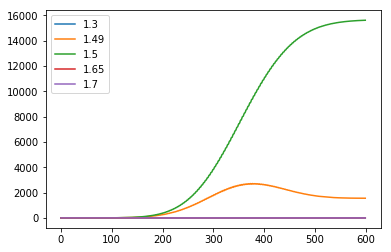

In [15]:
for e in energies:
    rho_sqr = rho_re[e]**2+rho_im[e]**2
    plt.plot(t,rho_sqr,label=str(e))
plt.legend()

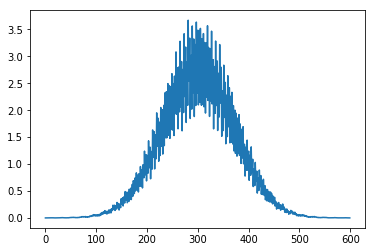

In [16]:
rho_sqr = rho_re[1.3]**2+rho_im[1.3]**2
plt.plot(t,rho_sqr)